#### Visualization for EUMETSAT/MSG Data

In [1]:
import autoroot

In [2]:
import os
import ast
import eumdac
import datetime
import shutil
import pyproj
import rioxarray
import rasterio
import xarray as xr

from pyproj import CRS

In [3]:
%load_ext autoreload
%autoreload 2

Unfortunately, .nat files are a bit complicated to read/load. One of the best packages is satpy, which then allows loading the files using xarray.

In [4]:
from satpy import Scene
scn = Scene(reader="seviri_l1b_native", filenames=['MSG4-SEVI-MSG15-0100-NA-20211110081242.766000000Z-NA.nat'])

In [5]:
# MSG data contains 12 channels, including the high-resolution visible (HRV) channel.
datasets = scn.available_dataset_names()
datasets

['HRV',
 'IR_016',
 'IR_039',
 'IR_087',
 'IR_097',
 'IR_108',
 'IR_120',
 'IR_134',
 'VIS006',
 'VIS008',
 'WV_062',
 'WV_073']

In order to convert the scn object to xarray, each dataset needs to be loaded.

In [6]:
scn.load(datasets[1:], generate=False)
# Note: The HRV channel comes in 1 km resolution, while the other channels are 3 km resolution.
# Because of the size mismatch, the HRV channel would either need to be downscaled,
# or it needs to the loaded separetely to the other channels


/opt/anaconda3/envs/iti-env/lib/python3.11/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/opt/anaconda3/envs/iti-env/lib/python3.11/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/opt/anaconda3/envs/iti-env/lib/python3.11/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/opt/anaconda3/envs/iti-env/lib/python3.11/site-packages/xarray/core/concat.py:544: FutureWarning

In [7]:
ds = scn.to_xarray()

/opt/anaconda3/envs/iti-env/lib/python3.11/site-packages/satpy/cf/coords.py:201: UserWarning: Cannot pretty-format "acq_time" coordinates because they are not identical among the given datasets
  _warn_if_pretty_but_not_unique(pretty, coord_name)


In [36]:
ds.VIS006

<xarray.DataArray 'VIS006' (y: 3712, x: 3712)>
dask.array<mul, shape=(3712, 3712), dtype=float32, chunksize=(928, 3712), chunktype=numpy.ndarray>
Coordinates: (12/15)
    IR_016_acq_time  (y) datetime64[ns] NaT NaT NaT NaT NaT ... NaT NaT NaT NaT
  * y                (y) float64 -5.566e+06 -5.563e+06 ... 5.566e+06 5.569e+06
  * x                (x) float64 5.566e+06 5.563e+06 ... -5.566e+06 -5.569e+06
    longitude        (y, x) float64 dask.array<chunksize=(928, 3712), meta=np.ndarray>
    latitude         (y, x) float64 dask.array<chunksize=(928, 3712), meta=np.ndarray>
    IR_039_acq_time  (y) datetime64[ns] NaT NaT NaT NaT NaT ... NaT NaT NaT NaT
    ...               ...
    IR_120_acq_time  (y) datetime64[ns] NaT NaT NaT NaT NaT ... NaT NaT NaT NaT
    IR_134_acq_time  (y) datetime64[ns] NaT NaT NaT NaT NaT ... NaT NaT NaT NaT
    VIS006_acq_time  (y) datetime64[ns] NaT NaT NaT NaT NaT ... NaT NaT NaT NaT
    VIS008_acq_time  (y) datetime64[ns] NaT NaT NaT NaT NaT ... NaT NaT NaT NaT
    WV_062_acq_time  (y) datetime64[ns] NaT NaT NaT NaT NaT ... NaT NaT NaT NaT
    WV_073_acq_time  (y) datetime64[ns] NaT NaT NaT NaT NaT ... NaT NaT NaT NaT
Attributes: (12/17)
    calibration:                            reflectance
    end_time:                               2021-11-10 08:15:00
    georef_offset_corrected:                true
    grid_mapping:                           msg_seviri_fes_3km
    modifiers:                              []
    orbital_parameters:                     {"projection_longitude": 0.0, "pr...
    ...                                     ...
    start_time:                             2021-11-10 08:00:00
    sun_earth_distance_correction_applied:  true
    sun_earth_distance_correction_factor:   0.9901881739103313
    time_parameters:                        {"nominal_start_time": "2021-11-1...
    units:                                  %
    wavelength:                             0.635 µm (0.56-0.71 µm)

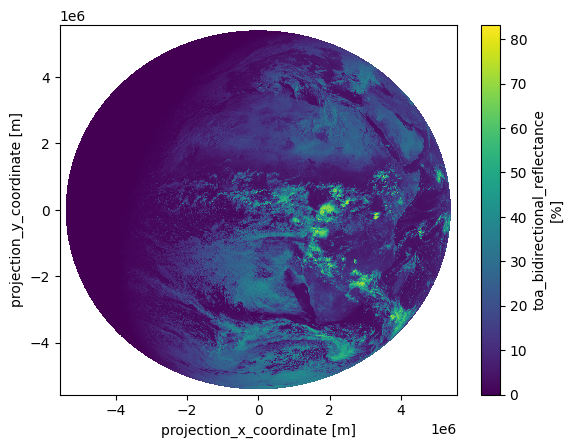

In [37]:
ds.VIS006.plot()

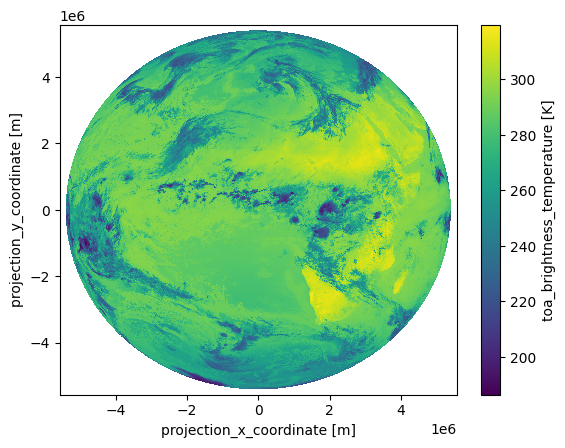

In [38]:
ds.IR_108.plot()

TODO:

- The channels all contain different information (e.g. reflectance [%], BT [K]). This needs to be standardized